In [1]:
from sklearn.model_selection import train_test_split
from preamble import *
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib as plt
import mglearn
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

In [2]:


df = pd.read_csv("C:/Users/Kapila/Desktop/Macquarie coursework/COMP777 Computing Methods of Research/Final Project/Dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv") #Reading the dataset in a dataframe using Pandas

In [3]:

print("Keys of newsdataset: {}".format(df.keys()))

Keys of newsdataset: Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_p

In [4]:


df.loc[df['shares'] <= 1400, 'split'] = 'Unpopular'
df.loc[df['shares'] > 1400, 'split'] = 'Popular'

df['split']

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614    Unpopular
39615      Popular
39616      Popular
39617    Unpopular
39618    Unpopular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625    Unpopular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

In [5]:
print(df['url'][:193] + "\n...")
print("Keys of newsdataset: {}".format(df.keys()))

0      http://mashable.com/2013/01/07/amazon-instant-...
1      http://mashable.com/2013/01/07/apple-40-billio...
2      http://mashable.com/2013/01/07/ap-samsung-spon...
3      http://mashable.com/2013/01/07/astronaut-notre...
4      http://mashable.com/2013/01/07/att-u-verse-app...
5      http://mashable.com/2013/01/07/beewi-smart-toy...
6      http://mashable.com/2013/01/07/bodymedia-armba...
7      http://mashable.com/2013/01/07/canon-poweshot-...
8      http://mashable.com/2013/01/07/car-of-the-futu...
9      http://mashable.com/2013/01/07/chuck-hagel-web...
10     http://mashable.com/2013/01/07/cosmic-events-d...
11     http://mashable.com/2013/01/07/crayon-creature...
12     http://mashable.com/2013/01/07/creature-cups/\...
13        http://mashable.com/2013/01/07/dad-jokes/\n...
14     http://mashable.com/2013/01/07/downton-abbey-t...
15     http://mashable.com/2013/01/07/earth-size-plan...
16        http://mashable.com/2013/01/07/echo-game/\n...
17     http://mashable.com/2013

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,split
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,...,0.00,0.19,593,Unpopular
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.50,0.00,1500,Popular
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.50,0.00,711,Unpopular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,...,0.50,0.00,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,...,0.05,0.14,505,Unpopular


In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.00,39644.00,39644.00,39644.00,...,39644.00,39644.00,39644.00,39644.00
mean,354.53,10.40,546.51,0.55,...,0.07,0.34,0.16,3395.38
std,214.16,2.11,471.11,3.52,...,0.27,0.19,0.23,11626.95
min,8.00,2.00,0.00,0.00,...,-1.00,0.00,0.00,1.00
25%,164.00,9.00,246.00,0.47,...,0.00,0.17,0.00,946.00
50%,339.00,10.00,409.00,0.54,...,0.00,0.50,0.00,1400.00
75%,542.00,12.00,716.00,0.61,...,0.15,0.50,0.25,2800.00
max,731.00,23.00,8474.00,701.00,...,1.00,0.50,1.00,843300.00


In [8]:
df[0:3]

,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,split
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,...,0.0,0.19,593,Unpopular
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.5,0.00,1500,Popular
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.5,0.00,711,Unpopular


In [9]:
df['url'][0]

'http://mashable.com/2013/01/07/amazon-instant-video-browser/'

In [10]:
df.head()


,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,split
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,...,0.00,0.19,593,Unpopular
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.50,0.00,1500,Popular
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.50,0.00,711,Unpopular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,...,0.50,0.00,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,...,0.05,0.14,505,Unpopular


In [11]:
df[1:10]

,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,split
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.50,0.00,1500,Popular
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.50,0.00,711,Unpopular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,...,0.50,0.00,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,...,0.05,0.14,505,Unpopular
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,...,0.14,0.21,855,Unpopular
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,...,0.50,0.00,556,Unpopular
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,...,0.50,0.50,891,Unpopular
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,...,0.38,0.00,3600,Popular
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,...,0.50,0.00,710,Unpopular


In [12]:
print("Type of data: {}".format(type(df)))

Type of data: <class 'pandas.core.frame.DataFrame'>


In [13]:
df.shape

(39644, 62)

In [14]:
print(len(df.index))

39644


In [15]:
list(df.columns.values)

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

In [16]:
#removing the attributes url and timedelta which are non predictive variables
dfr12 = df.iloc[:, 2:60]
print(dfr12)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               219             0.66               1.0   
1                   9               211             0.58               1.0   
2                   9               255             0.60               1.0   
3                   9               531             0.50               1.0   
4                  13              1072             0.42               1.0   
5                  10               370             0.56               1.0   
6                   8               960             0.42               1.0   
7                  12               989             0.43               1.0   
8                  11                97             0.67               1.0   
9                  10               231             0.64               1.0   
10                  9              1248             0.49               1.0   
11                 10               187             0.67        

In [17]:
# Use `iloc[]` to select a row
print(df.iloc[0])

# Use `loc[]` to select a column
print(df.loc[:,'url'])

url                              http://mashable.com/2013/01/07/amazon-instant-...
timedelta                                                                      731
n_tokens_title                                                                  12
n_tokens_content                                                               219
n_unique_tokens                                                               0.66
n_non_stop_words                                                                 1
n_non_stop_unique_tokens                                                      0.82
num_hrefs                                                                        4
num_self_hrefs                                                                   2
num_imgs                                                                         1
num_videos                                                                       0
average_token_length                                                           4.7
num_

In [18]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,split
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,...,0.00,0.19,593,Unpopular
1,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,...,0.50,0.00,1500,Popular
2,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,...,0.50,0.00,711,Unpopular
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,...,0.50,0.00,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,...,0.05,0.14,505,Unpopular


In [19]:
dfr12.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [20]:
data=dfr12

In [21]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [22]:
target=  df.iloc[:,61]

In [23]:
target.head()

0    Unpopular
1      Popular
2    Unpopular
3    Unpopular
4    Unpopular
Name: split, dtype: object

In [24]:
print(target)

0        Unpopular
1          Popular
2        Unpopular
3        Unpopular
4        Unpopular
5        Unpopular
6        Unpopular
7        Unpopular
8          Popular
9        Unpopular
10         Popular
11         Popular
12       Unpopular
13         Popular
14       Unpopular
15         Popular
16         Popular
17         Popular
18         Popular
19         Popular
20         Popular
21       Unpopular
22       Unpopular
23         Popular
24       Unpopular
25       Unpopular
26         Popular
27         Popular
28       Unpopular
29       Unpopular
           ...    
39614    Unpopular
39615      Popular
39616      Popular
39617    Unpopular
39618    Unpopular
39619    Unpopular
39620      Popular
39621      Popular
39622      Popular
39623    Unpopular
39624      Popular
39625    Unpopular
39626    Unpopular
39627    Unpopular
39628    Unpopular
39629      Popular
39630      Popular
39631    Unpopular
39632      Popular
39633      Popular
39634    Unpopular
39635    Unp

In [25]:
print("Type of data: {}".format(type(df)))
print("Type of data: {}".format(type(data)))
print("Type of data: {}".format(type(target)))

Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.frame.DataFrame'>
Type of data: <class 'pandas.core.series.Series'>


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [27]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (29733, 58)
y_train shape: (29733,)


In [28]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (9911, 58)
y_test shape: (9911,)


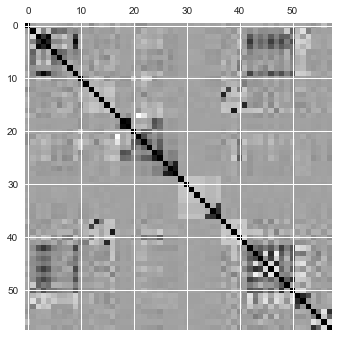

In [29]:
plt.matshow(X_train.corr())

plt.savefig('myfig')

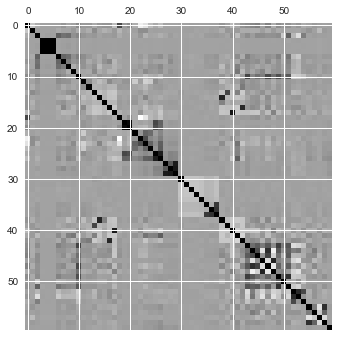

In [30]:
plt.matshow(df.corr())

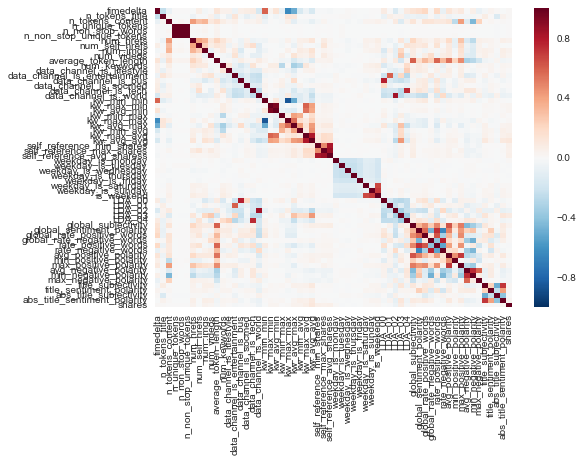

In [35]:
#Seaborn's heatmap version:

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('foo.png')


In [32]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [33]:
# Create a Randomized PCA model that takes two components
#randomized_pca = RandomizedPCA(n_components=2)

# Fit and transform the data to the model
#reduced_data_rpca = randomized_pca.fit_transform(data)

# Create a regular PCA model 
#pca = PCA(n_components=2)

# Fit and transform the data to the model
#reduced_data_pca = pca.fit_transform(data)

# Inspect the shape
#reduced_data_pca.shape

# Print out the data
#print(reduced_data_rpca)
#print(reduced_data_pca)

In [34]:
plt.savefig('fig1.png')

In [36]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.00,39644.00,39644.00,39644.00,...,39644.00,39644.00,39644.00,39644.00
mean,354.53,10.40,546.51,0.55,...,0.07,0.34,0.16,3395.38
std,214.16,2.11,471.11,3.52,...,0.27,0.19,0.23,11626.95
min,8.00,2.00,0.00,0.00,...,-1.00,0.00,0.00,1.00
25%,164.00,9.00,246.00,0.47,...,0.00,0.17,0.00,946.00
50%,339.00,10.00,409.00,0.54,...,0.00,0.50,0.00,1400.00
75%,542.00,12.00,716.00,0.61,...,0.15,0.50,0.25,2800.00
max,731.00,23.00,8474.00,701.00,...,1.00,0.50,1.00,843300.00


In [37]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.66,1.0,...,0.50,-0.19,0.00,0.19
1,9,211,0.58,1.0,...,0.00,0.00,0.50,0.00
2,9,255,0.60,1.0,...,0.00,0.00,0.50,0.00
3,9,531,0.50,1.0,...,0.00,0.00,0.50,0.00
4,13,1072,0.42,1.0,...,0.45,0.14,0.05,0.14


In [38]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.00,39644.00,39644.00,39644.00,...,39644.00,39644.00,39644.00,39644.00
mean,10.40,546.51,0.55,1.00,...,0.28,0.07,0.34,0.16
std,2.11,471.11,3.52,5.23,...,0.32,0.27,0.19,0.23
min,2.00,0.00,0.00,0.00,...,0.00,-1.00,0.00,0.00
25%,9.00,246.00,0.47,1.00,...,0.00,0.00,0.17,0.00
50%,10.00,409.00,0.54,1.00,...,0.15,0.00,0.50,0.00
75%,12.00,716.00,0.61,1.00,...,0.50,0.15,0.50,0.25
max,23.00,8474.00,701.00,1042.00,...,1.00,1.00,0.50,1.00
